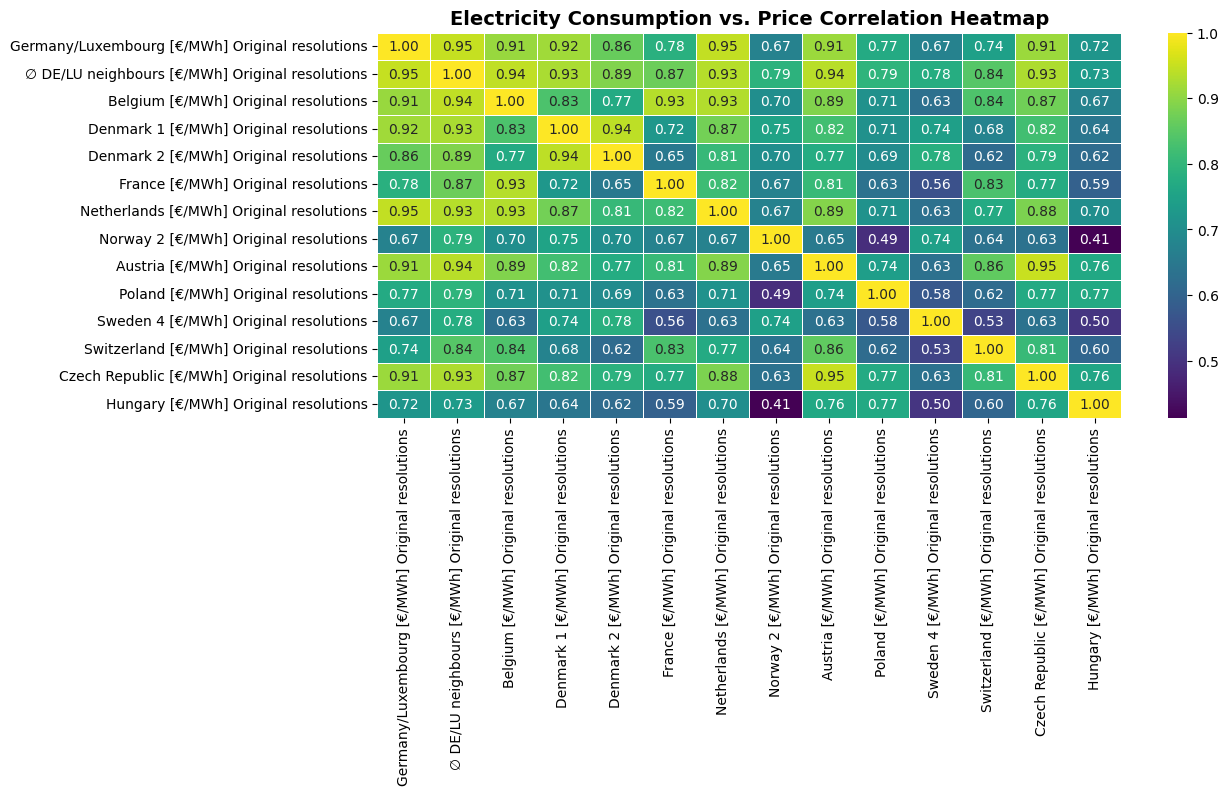

Plot saved: plots/electricity_consumption_price_heatmap.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

BASE_DIR = os.getcwd()
PLOTS_DIR = os.path.join(BASE_DIR, "..", "plots")

# Load datasets
price_file = "../data/refined_files/refined_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
consumption_file = "../data/refined_files/refined_cleaned_Actual_consumption_202301010000_202503050000_Quarterhour.csv"

df_price = pd.read_csv(price_file, delimiter=",", low_memory=False)
df_consumption = pd.read_csv(consumption_file, delimiter=",", low_memory=False)

# Convert time columns to datetime
df_price["Start date"] = pd.to_datetime(df_price["Start date"])
df_consumption["Start date"] = pd.to_datetime(df_consumption["Start date"])

# Merge datasets on "Start date"
df_merged = df_price.merge(df_consumption, on="Start date", how="inner")

# Drop non-numeric columns
df_numeric = df_merged.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Electricity Consumption vs. Price Correlation Heatmap", fontsize=14, fontweight="bold")
plt.savefig(os.path.join(PLOTS_DIR, "electricity_consumption_price_heatmap.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("Plot saved: plots/electricity_consumption_price_heatmap.png")
